## Calculate reference scores aka "structural similarities" between all spetra
### Here: structural similarity as measure by Tanimoto using circular fingerprints 
We here use Morgan type fingerprints, the rdkit version of ECFP type fingerprints

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matchms.importing import load_from_json
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

path_root = os.path.dirname(os.path.dirname(os.getcwd()))
path_data = os.path.join(path_root, 'Data')

In [2]:
def tanimoto_distribution(scores_ref, ref_score_bins):
    bin_content = []
    ref_score_bins_inclusive = ref_score_bins.copy()
    ref_score_bins_inclusive[0] = -np.inf
    ref_score_bins_inclusive[-1] = np.inf
    for i in range(len(ref_score_bins)-1):
        low = ref_score_bins_inclusive[i]
        high = ref_score_bins_inclusive[i+1]
        idx = np.where((scores_ref >= low) & (scores_ref < high))
        bin_content.append(idx[0].shape[0])
    return bin_content

## Load annotated spectra

In [2]:
import pickle

filename = os.path.join(path_data, 'GNPS_all', 'ALL_GNPS_210125_positive_processed_annotated.pickle')
with open(filename, 'rb') as file:
    spectrums = pickle.load(file)

print(f"{len(spectrums)} spectra imported.")

109734 spectra imported.


## Create reference scores (Tanimoto)
- Check better alternatives?

In [3]:
from collections import Counter 
  
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [4]:
inchikeys_list = []
for s in spectrums:
    inchikeys_list.append(s.get("inchikey"))

inchikeys14_array = np.array([x[:14] for x in inchikeys_list])

In [5]:
inchikeys14_unique = list({x[:14] for x in inchikeys_list})
len(inchikeys14_unique)

15062

In [6]:
inchikey14 = inchikeys14_unique[1000]
print(inchikey14)

idx = np.where(inchikeys14_array == inchikey14)[0]
for i in idx:
    print(spectrums[i].get("smiles") + "\n")

print("most frequent:", most_frequent([spectrums[i].get("smiles") for i in idx]))

VVIAGPKUTFNRDU
C1C(N(C2=C(N1)N=C(NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O

C1C(N(C2=C(N1)N=C(NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O

C1C(N(C2=C(N1)N=C(NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O

most frequent: C1C(N(C2=C(N1)N=C(NC2=O)N)C=O)CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(=O)O)C(=O)O


In [7]:
inchi_list = []
for s in spectrums:
    inchi_list.append(s.get("inchi"))

inchi_array = np.array(inchi_list)

In [8]:
inchi_mapping = []
ID_mapping = []

for inchikey14 in inchikeys14_unique:
    idx = np.where(inchikeys14_array == inchikey14)[0]
    
    inchi = most_frequent([spectrums[i].get("inchi") for i in idx])
    inchi_mapping.append(inchi)
    ID = idx[np.where(inchi_array[idx] == inchi)[0][0]]
    ID_mapping.append(ID)

In [9]:
import pandas as pd
metadata = pd.DataFrame(list(zip(inchikeys14_unique, inchi_mapping, ID_mapping)), columns=["inchikey14", "inchi", "ID"])
metadata.head()

,inchikey14,inchi,ID
0,GWLHFNKLJRZBAI,InChI=1S/C33H47N5O6/c1-5-23(39)13-7-6-8-15-25-...,1141
1,ZIYVHBGGAOATLY,"InChI=1S/C4H6O4/c1-2(3(5)6)4(7)8/h2H,1H3,(H,5,...",23955
2,FAKRSMQSSFJEIM,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...,1677
3,IAYOHSHBLLHXFB,InChI=1S/C17H16O5/c1-21-13-10-14(22-2)16(19)17...,7594
4,MQTHRHQDRZPYGH,"InChI=1S/C12H18O4/c1-11(2,15)5-4-8-6-10(14)12(...",11699


In [5]:
metadata = pd.read_csv("metadata_AllInchikeys_210317.csv")
metadata.head()

,Unnamed: 0,inchikey14,inchi,ID
0,0,JJGYRVZPUJUFTR,InChI=1S/C20H32O3/c1-13(11-17(22)23)7-8-15-14(...,11893
1,1,CSVWQRLFFUNUND,"""InChI=1S/C38H44N4O/c1-3-21-18-40-14-13-38-28-...",1690
2,2,PXWNBAGCFUDYBE,InChI=1S/C15H15NO2/c16-14-9-5-4-8-13(14)15(17)...,65190
3,3,DFJVUWAHTQPQCV,InChI=1S/C13H22N4O4S/c1-14-13(8-16(18)19)15-6-...,45927
4,4,PNOLBYVRLYUCIC,InChI=1S/C29H33NO10/c1-36-18-4-2-17(3-5-18)21-...,60397


In [6]:
spectrums[1690].get("inchikey")

'CSVWQRLFFUNUND-KJSNTNJZSA-N'

In [16]:
#metadata.to_csv("metadata_AllInchikeys_210317.csv")

metadata.head()

,inchikey14,inchi,ID
0,JJGYRVZPUJUFTR,InChI=1S/C20H32O3/c1-13(11-17(22)23)7-8-15-14(...,11893
1,CSVWQRLFFUNUND,"""InChI=1S/C38H44N4O/c1-3-21-18-40-14-13-38-28-...",1690
2,PXWNBAGCFUDYBE,InChI=1S/C15H15NO2/c16-14-9-5-4-8-13(14)15(17)...,65190
3,DFJVUWAHTQPQCV,InChI=1S/C13H22N4O4S/c1-14-13(8-16(18)19)15-6-...,45927
4,PNOLBYVRLYUCIC,InChI=1S/C29H33NO10/c1-36-18-4-2-17(3-5-18)21-...,60397


In [7]:
metadata.ID.values.shape

(15062,)

## Add fingerprints (where necessary) --> morgan-2, 2048 bits

In [8]:
from matchms.filtering.add_fingerprint import add_fingerprint

for i in tqdm(metadata.ID.values):
    spectrums[i] = add_fingerprint(spectrums[i],
                                   fingerprint_type="morgan2", nbits=2048)

  0%|          | 0/15062 [00:00<?, ?it/s]

In [9]:
for i in tqdm(metadata.ID.values):
    if np.any(np.isnan(spectrums[i].get("fingerprint"))):
        print(i)

  0%|          | 0/15062 [00:00<?, ?it/s]

### Pick one spectrum per InChIKey and calculate fingerprint based similarities

In [23]:
from matchms.similarity import FingerprintSimilarity

spectrums_represent = [spectrums[i] for i in metadata.ID.values]

similarity_measure = FingerprintSimilarity(similarity_measure="jaccard")
scores_mol_similarity = similarity_measure.matrix(spectrums_represent, spectrums_represent)

In [24]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_tanimoto_scores.npy")
np.save(filename, scores_mol_similarity)

In [3]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_tanimoto_scores.npy")
scores_mol_similarity = np.load(filename)

In [25]:
scores_mol_similarity.shape

(15062, 15062)

In [28]:
tanimoto_df = pd.DataFrame(scores_mol_similarity, columns=metadata.inchikey14.values, index=metadata.inchikey14.values)
tanimoto_df.head()

,JJGYRVZPUJUFTR,CSVWQRLFFUNUND,PXWNBAGCFUDYBE,DFJVUWAHTQPQCV,PNOLBYVRLYUCIC,HBNPJJILLOYFJU,IVKGLRZLTNXWKF,WHZAJDSPQDCUBB,LFVSQVHIKFDYFI,LBBJNGFCXDOYMQ,...,NBWDKCDWCBQNQQ,WKHWTIZYRUWECB,HYIFFZAQXPUEAU,GYOZYWVXFNDGLU,YNDYKPRNFWPPFU,IYODIJVWGPRBGQ,XHCADAYNFIFUHF,OJAGBDHRHPCDLN,POUZLUJYBWGJJO,JAYJEXYYCNLGOQ
JJGYRVZPUJUFTR,1.000000,0.075000,0.102941,0.070588,0.107843,0.134615,0.097561,0.080460,0.112500,0.088235,...,0.101124,0.132353,0.115942,0.139241,0.083333,0.027397,0.086420,0.122449,0.089552,0.125000
CSVWQRLFFUNUND,0.075000,1.000000,0.065421,0.083333,0.070423,0.113475,0.066116,0.090164,0.075630,0.076190,...,0.104839,0.026549,0.026549,0.093220,0.026316,0.096154,0.058333,0.087591,0.037037,0.064516
PXWNBAGCFUDYBE,0.102941,0.065421,1.000000,0.101449,0.101124,0.119565,0.171875,0.128571,0.121212,0.092593,...,0.169014,0.169811,0.107143,0.086957,0.105263,0.090909,0.106061,0.104651,0.160000,0.057143
DFJVUWAHTQPQCV,0.070588,0.083333,0.101449,1.000000,0.075472,0.081818,0.123457,0.067416,0.097561,0.071429,...,0.087912,0.068493,0.083333,0.083333,0.053333,0.055556,0.112500,0.099010,0.104478,0.067227
PNOLBYVRLYUCIC,0.107843,0.070423,0.101124,0.075472,1.000000,0.128000,0.130000,0.093458,0.120000,0.127907,...,0.287234,0.098901,0.075269,0.177083,0.086022,0.065217,0.290698,0.242991,0.090909,0.103704


In [29]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_tanimoto_scores.pickle")
tanimoto_df.to_pickle(filename)

In [30]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_tanimoto_labels.csv")
metadata.inchikey14.to_csv(filename)

In [4]:
ref_score_bins = np.linspace(0,1.0, 11)
bin_content = tanimoto_distribution(scores_mol_similarity, ref_score_bins)

In [8]:
filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan2_2048.npy")
np.save(filename, bin_content)

Text(0, 0.5, 'pair occurences in full training data set')

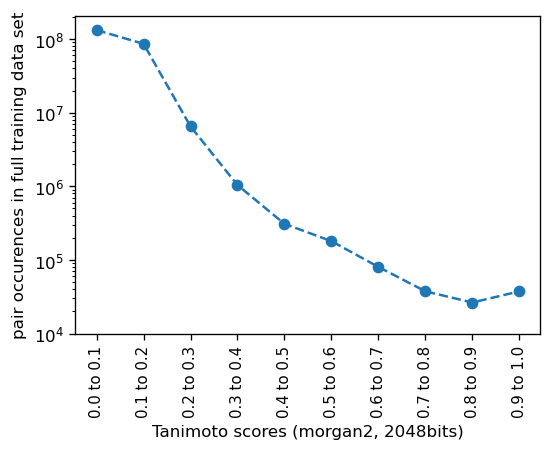

In [9]:
from matplotlib import pyplot as plt 

bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(5,3.5), dpi=120)
plt.plot(ref_score_bins[:-1], bin_content, "o--")
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Tanimoto scores (morgan2, 2048bits)")
plt.ylim(1e4)
plt.ylabel("pair occurences in full training data set")

In [31]:
import csv
labels =[]
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        labels+=row

In [33]:
len(labels)

15062

## Morgan 2 - 1024 bits

In [37]:
from matchms.filtering.add_fingerprint import add_fingerprint

for i in tqdm(metadata.ID.values):
    spectrums[i] = add_fingerprint(spectrums[i],
                                   fingerprint_type="morgan2", nbits=1024)

  0%|          | 0/15062 [00:00<?, ?it/s]

In [38]:
spectrums_represent = [spectrums[i] for i in metadata.ID.values]

similarity_measure = FingerprintSimilarity(similarity_measure="jaccard")
scores_mol_similarity = similarity_measure.matrix(spectrums_represent, spectrums_represent)

In [39]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_1024_tanimoto_scores.npy")
np.save(filename, scores_mol_similarity)

In [10]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_1024_tanimoto_scores.npy")
scores_mol_similarity = np.load(filename)

In [40]:
tanimoto_df = pd.DataFrame(scores_mol_similarity, columns=metadata.inchikey14.values, index=metadata.inchikey14.values)
tanimoto_df.head()

,JJGYRVZPUJUFTR,CSVWQRLFFUNUND,PXWNBAGCFUDYBE,DFJVUWAHTQPQCV,PNOLBYVRLYUCIC,HBNPJJILLOYFJU,IVKGLRZLTNXWKF,WHZAJDSPQDCUBB,LFVSQVHIKFDYFI,LBBJNGFCXDOYMQ,...,NBWDKCDWCBQNQQ,WKHWTIZYRUWECB,HYIFFZAQXPUEAU,GYOZYWVXFNDGLU,YNDYKPRNFWPPFU,IYODIJVWGPRBGQ,XHCADAYNFIFUHF,OJAGBDHRHPCDLN,POUZLUJYBWGJJO,JAYJEXYYCNLGOQ
JJGYRVZPUJUFTR,1.000000,0.075630,0.104478,0.109756,0.118812,0.135922,0.126582,0.081395,0.112500,0.088235,...,0.102273,0.132353,0.149254,0.173333,0.098592,0.027397,0.087500,0.135417,0.089552,0.145455
CSVWQRLFFUNUND,0.075630,1.000000,0.066667,0.093220,0.102190,0.131387,0.076271,0.100840,0.085470,0.087379,...,0.125000,0.045455,0.055046,0.095652,0.054545,0.097087,0.068376,0.113636,0.037383,0.123288
PXWNBAGCFUDYBE,0.104478,0.066667,1.000000,0.136364,0.114943,0.122222,0.196721,0.132353,0.140625,0.094340,...,0.208955,0.173077,0.129630,0.090909,0.107143,0.113208,0.126984,0.134146,0.163265,0.078431
DFJVUWAHTQPQCV,0.109756,0.093220,0.136364,1.000000,0.096154,0.102804,0.139241,0.080460,0.111111,0.071429,...,0.126437,0.083333,0.114286,0.085366,0.067568,0.055556,0.128205,0.111111,0.121212,0.094828
PNOLBYVRLYUCIC,0.118812,0.102190,0.114943,0.096154,1.000000,0.166667,0.131313,0.094340,0.120000,0.127907,...,0.304348,0.111111,0.098901,0.180851,0.086022,0.065217,0.309524,0.257143,0.090909,0.128788


In [41]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_1024_tanimoto_scores.pickle")
tanimoto_df.to_pickle(filename)

In [42]:
filename = os.path.join(path_data, "ALL_GNPS_210125_positive_morgan2_1024_tanimoto_labels.csv")
metadata.inchikey14.to_csv(filename)

In [11]:
ref_score_bins = np.linspace(0,1.0, 11)
bin_content = tanimoto_distribution(scores_mol_similarity, ref_score_bins)

In [12]:
filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan2_1024.npy")
np.save(filename, bin_content)

Text(0, 0.5, 'pair occurences in full training data set')

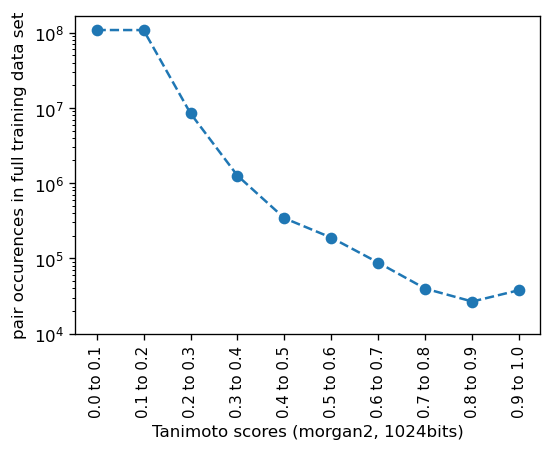

In [13]:
from matplotlib import pyplot as plt 

bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(5,3.5), dpi=120)
plt.plot(ref_score_bins[:-1], bin_content, "o--")
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Tanimoto scores (morgan2, 1024bits)")
plt.ylim(1e4)
plt.ylabel("pair occurences in full training data set")

## Add fingerprints (where necessary) --> morgan-3, 2048 bits

In [14]:
from matchms.filtering.add_fingerprint import add_fingerprint

for i in tqdm(metadata.ID.values):
    spectrums[i] = add_fingerprint(spectrums[i],
                                   fingerprint_type="morgan3", nbits=2048)

  0%|          | 0/15062 [00:00<?, ?it/s]

In [15]:
for i in tqdm(metadata.ID.values):
    if np.any(np.isnan(spectrums[i].get("fingerprint"))):
        print(i)

  0%|          | 0/15062 [00:00<?, ?it/s]

### Pick one spectrum per InChIKey and calculate fingerprint based similarities

In [16]:
from matchms.similarity import FingerprintSimilarity

spectrums_represent = [spectrums[i] for i in metadata.ID.values]

similarity_measure = FingerprintSimilarity(similarity_measure="jaccard")
scores_mol_similarity = similarity_measure.matrix(spectrums_represent, spectrums_represent)

In [17]:
filename = os.path.join(path_data, "ALL_GNPS_210125_morgan3_2048_tanimoto_scores.npy")
np.save(filename, scores_mol_similarity)

In [18]:
scores_mol_similarity.shape

(15062, 15062)

In [19]:
tanimoto_df = pd.DataFrame(scores_mol_similarity, columns=metadata.inchikey14.values, index=metadata.inchikey14.values)
tanimoto_df.head()

,JJGYRVZPUJUFTR,CSVWQRLFFUNUND,PXWNBAGCFUDYBE,DFJVUWAHTQPQCV,PNOLBYVRLYUCIC,HBNPJJILLOYFJU,IVKGLRZLTNXWKF,WHZAJDSPQDCUBB,LFVSQVHIKFDYFI,LBBJNGFCXDOYMQ,...,NBWDKCDWCBQNQQ,WKHWTIZYRUWECB,HYIFFZAQXPUEAU,GYOZYWVXFNDGLU,YNDYKPRNFWPPFU,IYODIJVWGPRBGQ,XHCADAYNFIFUHF,OJAGBDHRHPCDLN,POUZLUJYBWGJJO,JAYJEXYYCNLGOQ
JJGYRVZPUJUFTR,1.000000,0.077381,0.073684,0.054545,0.106383,0.105634,0.078947,0.066116,0.100917,0.075269,...,0.079365,0.094737,0.086957,0.116505,0.061224,0.020202,0.081818,0.105263,0.065934,0.085366
CSVWQRLFFUNUND,0.077381,1.000000,0.057692,0.078313,0.073529,0.094527,0.044944,0.066667,0.051724,0.058442,...,0.093407,0.030864,0.044872,0.078788,0.018293,0.078947,0.040000,0.071429,0.025641,0.080717
PXWNBAGCFUDYBE,0.073684,0.057692,1.000000,0.075269,0.068702,0.084615,0.126316,0.097087,0.094737,0.063291,...,0.111111,0.113924,0.090909,0.087912,0.086420,0.075949,0.084211,0.091667,0.109589,0.038462
DFJVUWAHTQPQCV,0.054545,0.078313,0.075269,1.000000,0.062069,0.068966,0.100000,0.058333,0.072727,0.053763,...,0.063492,0.073684,0.065217,0.066038,0.040816,0.042105,0.083333,0.074074,0.091954,0.066667
PNOLBYVRLYUCIC,0.106383,0.073529,0.068702,0.062069,1.000000,0.101695,0.087838,0.063694,0.089655,0.095238,...,0.234043,0.083969,0.053435,0.133333,0.059701,0.053030,0.207692,0.170886,0.062992,0.080000


In [20]:
filename = os.path.join(path_data, "ALL_GNPS_210125_morgan3_2048_tanimoto_scores.pickle")
tanimoto_df.to_pickle(filename)

In [30]:
filename = os.path.join(path_data, "ALL_GNPS_210125_morgan3_2048_tanimoto_labels.csv")
metadata.inchikey14.to_csv(filename)

In [31]:
import csv
labels =[]
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        labels+=row

In [33]:
len(labels)

15062

In [38]:
ref_score_bins = np.linspace(0,1.0, 11)
bin_content = tanimoto_distribution(scores_mol_similarity, ref_score_bins)

In [43]:
filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan3_2048.npy")
np.save(filename, bin_content)

Text(0, 0.5, 'pair occurences in full training data set')

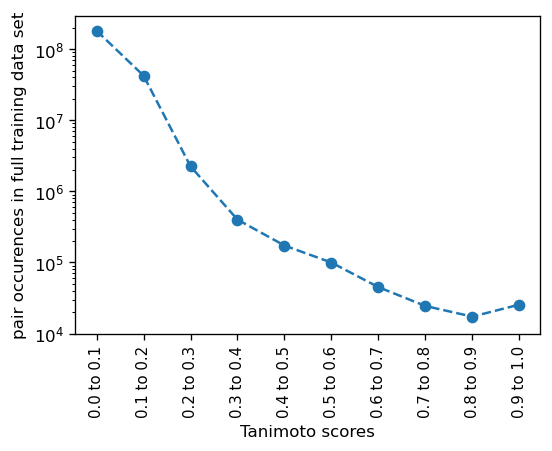

In [42]:
from matplotlib import pyplot as plt 

bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(5,3.5), dpi=120)
plt.plot(bins[:-1], bin_content, "o--")
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Tanimoto scores")
plt.ylim(1e4)
plt.ylabel("pair occurences in full training data set")

# Dice score (morgan2-2048 fingerprints)

In [11]:
from matchms.similarity import FingerprintSimilarity

spectrums_represent = [spectrums[i] for i in metadata.ID.values]

similarity_measure = FingerprintSimilarity(similarity_measure="dice")
scores_mol_similarity = similarity_measure.matrix(spectrums_represent, spectrums_represent)

In [12]:
filename = os.path.join(path_data, "ALL_GNPS_210125_morgan2_2048_dice_scores.npy")
np.save(filename, scores_mol_similarity)

In [13]:
scores_mol_similarity.shape

(15062, 15062)

In [14]:
dice_df = pd.DataFrame(scores_mol_similarity, columns=metadata.inchikey14.values, index=metadata.inchikey14.values)
dice_df.head()

,JJGYRVZPUJUFTR,CSVWQRLFFUNUND,PXWNBAGCFUDYBE,DFJVUWAHTQPQCV,PNOLBYVRLYUCIC,HBNPJJILLOYFJU,IVKGLRZLTNXWKF,WHZAJDSPQDCUBB,LFVSQVHIKFDYFI,LBBJNGFCXDOYMQ,...,NBWDKCDWCBQNQQ,WKHWTIZYRUWECB,HYIFFZAQXPUEAU,GYOZYWVXFNDGLU,YNDYKPRNFWPPFU,IYODIJVWGPRBGQ,XHCADAYNFIFUHF,OJAGBDHRHPCDLN,POUZLUJYBWGJJO,JAYJEXYYCNLGOQ
JJGYRVZPUJUFTR,1.000000,0.139535,0.186667,0.131868,0.194690,0.237288,0.177778,0.148936,0.202247,0.162162,...,0.183673,0.233766,0.207792,0.244444,0.153846,0.053333,0.159091,0.218182,0.164384,0.222222
CSVWQRLFFUNUND,0.139535,1.000000,0.122807,0.153846,0.131579,0.203822,0.124031,0.165414,0.140625,0.141593,...,0.189781,0.051724,0.051724,0.170543,0.051282,0.175439,0.110236,0.161074,0.071429,0.121212
PXWNBAGCFUDYBE,0.186667,0.122807,1.000000,0.184211,0.183673,0.213592,0.293333,0.227848,0.216216,0.169492,...,0.289157,0.290323,0.193548,0.160000,0.190476,0.166667,0.191781,0.189474,0.275862,0.108108
DFJVUWAHTQPQCV,0.131868,0.153846,0.184211,1.000000,0.140351,0.151261,0.219780,0.126316,0.177778,0.133333,...,0.161616,0.128205,0.153846,0.153846,0.101266,0.105263,0.202247,0.180180,0.189189,0.125984
PNOLBYVRLYUCIC,0.194690,0.131579,0.183673,0.140351,1.000000,0.226950,0.230088,0.170940,0.214286,0.226804,...,0.446281,0.180000,0.140000,0.300885,0.158416,0.122449,0.450450,0.390977,0.166667,0.187919


In [21]:
filename = os.path.join(path_data, "ALL_GNPS_210125_morgan2_2048_dice_scores.pickle")
dice_df.to_pickle(filename)

In [16]:
ref_score_bins = np.linspace(0,1.0, 11)
bin_content = tanimoto_distribution(scores_mol_similarity, ref_score_bins)

In [17]:
filename = os.path.join(path_data, "pair_distribution_dice_morgan2_2048.npy")
np.save(filename, bin_content)

Text(0, 0.5, 'pair occurences in full training data set')

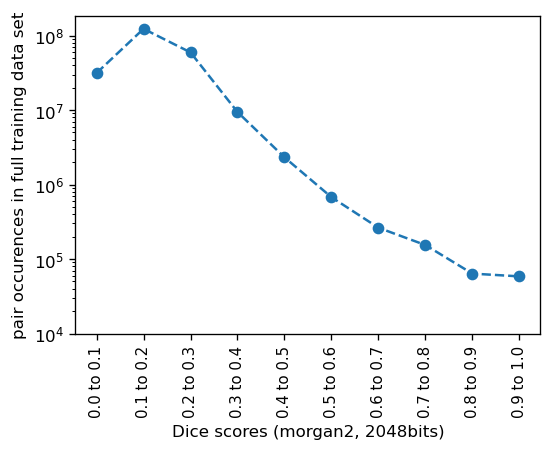

In [19]:
from matplotlib import pyplot as plt 

bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(5,3.5), dpi=120)
plt.plot(ref_score_bins[:-1], bin_content, "o--")
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Dice scores (morgan2, 2048bits)")
plt.ylim(1e4)
plt.ylabel("pair occurences in full training data set")

# Create distributions plot

In [14]:
filename = os.path.join(path_data, "similarities_ALL_GNPS_210125_positive_daylight2048_jaccard.npy")
scores_mol_similarity = np.load(filename)

ref_score_bins = np.linspace(0,1.0, 11)
bin_content = tanimoto_distribution(scores_mol_similarity, ref_score_bins)

filename = os.path.join(path_data, "pair_distribution_tanimoto_daylight_2048.npy")
np.save(filename, bin_content)

In [3]:
bin_contents = []
labels = []

filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan3_2048.npy")
bin_contents.append(np.load(filename))
labels.append("Tanimoto (morgan3, 2048bits)")

filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan2_1024.npy")
bin_contents.append(np.load(filename))
labels.append("Tanimoto morgan2, 1024bits)")

filename = os.path.join(path_data, "pair_distribution_Tanimoto_morgan2_2048.npy")
bin_contents.append(np.load(filename))
labels.append("Tanimoto (morgan2, 2048bits)")

filename = os.path.join(path_data, "pair_distribution_dice_morgan2_2048.npy")
bin_contents.append(np.load(filename))
labels.append("Dice (morgan2, 2048bits)")

filename = os.path.join(path_data, "pair_distribution_tanimoto_daylight_2048.npy")
bin_contents.append(np.load(filename))
labels.append("Tanimoto (daylight, 2048bits)")

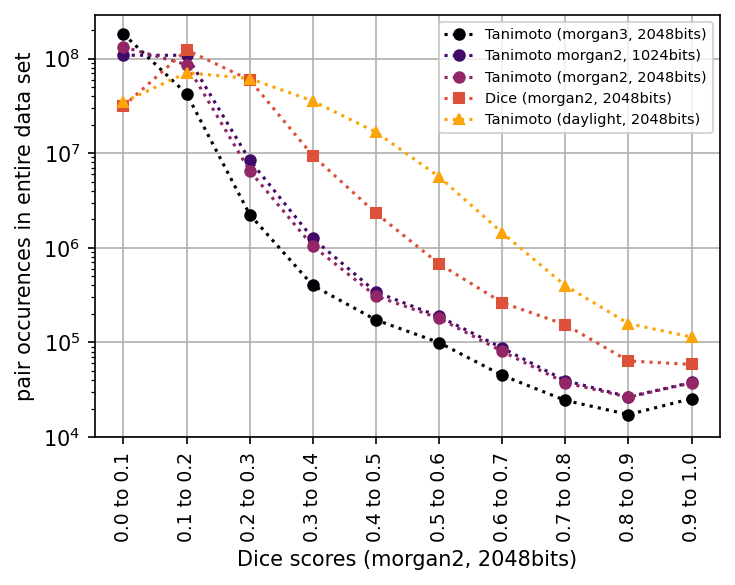

In [60]:
from matplotlib import pyplot as plt 
import matplotlib
cmap = matplotlib.cm.get_cmap('inferno')

markertypes = ["o", "o", "o", "s", "^"]
bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(5,4), dpi=150)
for i, bin_content in enumerate(bin_contents):
    plt.plot(ref_score_bins[:-1], bin_content, "o:", marker=markertypes[i],
             markersize=5, color=cmap(i/5), label=labels[i])
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Dice scores (morgan2, 2048bits)")
plt.ylim(1e4)
plt.ylabel("pair occurences in entire data set")
plt.legend(fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.savefig("pair_occurences_fingerprint_similaritiesOLD.pdf")

In [6]:
bin_contents_sorted = [bin_contents[i] for i in [0,2,3,4]]
labels_sorted = [labels[i] for i in [0,2,3,4]]

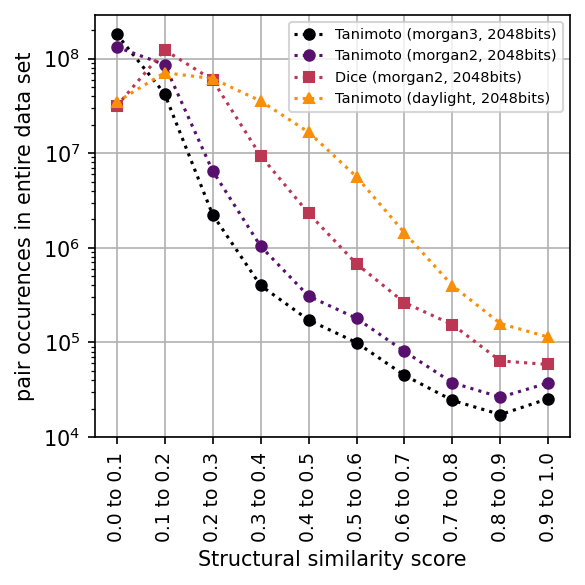

In [8]:
from matplotlib import pyplot as plt 
import matplotlib
cmap = matplotlib.cm.get_cmap('inferno')

ref_score_bins = np.linspace(0,1.0, 11)

markertypes = ["o", "o", "s", "^"]
bounds = [f"{a:.1f} to {a+0.1:.1f}" for a in ref_score_bins[:-1]]

plt.figure(figsize=(4,4), dpi=150)
for i in [0,1,2,3]:
    bin_content = bin_contents_sorted[i]
    plt.plot(ref_score_bins[:-1], bin_content, "o:", marker=markertypes[i],
             markersize=5, color=cmap(i/4), label=labels_sorted[i])
plt.yscale('log')
plt.xticks(ref_score_bins[:-1],
           bounds, fontsize=9, rotation='vertical')
plt.xlabel("Structural similarity score")
plt.ylim(1e4)
plt.ylabel("pair occurences in entire data set")
plt.legend(fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.savefig("pair_occurences_fingerprint_similarities.pdf")